In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


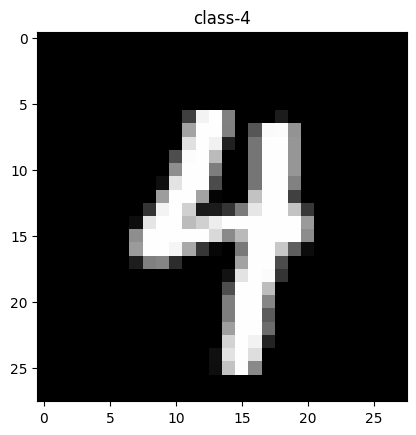

Train image 6901-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  63 243 255 129   0   0   0
   28   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 164 254 254 128   0  86 250
  251 148   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = './data_images/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [13]:
# Your validation set extraction script/code 

xtrain_flat = train_images.flatten().reshape(60000,28*28).astype(np.float64)

validation_ratio = 0.2
validation_samples = int(validation_ratio * len(xtrain_flat))  #12000

xvalidation = xtrain_flat[:validation_samples]
yvalidation = train_labels[:validation_samples]

xtrain_new = xtrain_flat[validation_samples:]
ytrain_new = train_labels[validation_samples:]

print('New Training data (X) size: {}, and labels (Y) size: {}'.format(xtrain_new.shape, ytrain_new.shape))
print('Validation data (X) size: {}, and labels (Y) size: {}'.format(xvalidation.shape, yvalidation.shape))


New Training data (X) size: (48000, 784), and labels (Y) size: (48000,)
Validation data (X) size: (12000, 784), and labels (Y) size: (12000,)


In [14]:
# Flatteing the test dataset

xtest = test_images.flatten().reshape(10000,28*28).astype(np.float64)
ytest = test_labels

print('Test data (X) size: {}, and labels (Y) size: {}' .format(xtest.shape, ytest.shape))

Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [15]:
from collections import Counter

In [22]:
# Different distances between 2 points x1 and x2 

def euclidean_dist_points(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))      # p = 2

def manhattan_dist_points(x1,x2):
    return np.sum(np.abs(x1 - x2))            # p = 1

def chebyshev_dist_points(x1, x2):
    return np.max(np.abs(x1 - x2))            # p = infinity


In [23]:
# Your k-NN algorithm script/code 

class KNN:
    
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    
    # -------------------------- EUCLIDEAN DISTANCE-----------------------------------

    def predict_class_by_euclidean_distance(self, X_validation):                         # for all the x's in validation dataset        

        predictions = [self.predict_yvalue_for_single_x_obs_by_euclidean(x_obs) for x_obs in X_validation]  # take each x in validation set and run this function
        return predictions
    
    

    def predict_yvalue_for_single_x_obs_by_euclidean(self, x_obs):
        
        distance = [ euclidean_dist_points(x_obs, x_train) for x_train in self.X_train ]  # finding dist of x_obs with all the x's in training dataset 
        
        k_indices = np.argsort(distance)[:self.k]                                         # get the indices of the k nearest nearbours

        k_nearest_label = [self.y_train[i] for i in k_indices]                            # now wrt these indices get the corresponding y_value in Training dataset
        
        most_common = Counter(k_nearest_label).most_common()                              # voting of these above y values; get the max frequency one        
        return most_common[0][0]



    
    # ------------------------------ MANHATTAN DISTANCE -------------------------------------------

    def predict_class_by_manhattan_distance(self, X_validation):                         # for all the x's in validation dataset        

        predictions = [self.predict_yvalue_for_single_x_obs_by_manhattan(x_obs) for x_obs in X_validation]  # take each x in validation set and run this function
        return predictions
    
    

    def predict_yvalue_for_single_x_obs_by_manhattan(self, x_obs):
        
        distance = [ manhattan_dist_points(x_obs, x_train) for x_train in self.X_train ]  # finding dist of x_obs with all the x's in training dataset 
        
        k_indices = np.argsort(distance)[:self.k]                                         # get the indices of the k nearest nearbours

        k_nearest_label = [self.y_train[i] for i in k_indices]                            # now wrt these indices get the corresponding y_value in Training dataset
        
        most_common = Counter(k_nearest_label).most_common()                              # voting of these above y values; get the max frequency one
        return most_common[0][0]



    
    # ------------------------------ CHEBYSHEV DISTANCE ----------------------------------------

    def predict_class_by_chebyshev_distance(self, X_validation):                         # for all the x's in validation dataset        

        predictions = [self.predict_yvalue_for_single_x_obs_by_chebyshev(x_obs) for x_obs in X_validation]  # take each x in validation set and run this function
        return predictions
    
    

    def predict_yvalue_for_single_x_obs_by_chebyshev(self, x_obs):
        
        distance = [ chebyshev_dist_points(x_obs, x_train) for x_train in self.X_train ]  # finding dist of x_obs with all the x's in training dataset 
        
        k_indices = np.argsort(distance)[:self.k]                                         # get the indices of the k nearest nearbours

        k_nearest_label = [self.y_train[i] for i in k_indices]                            # now wrt these indices get the corresponding y_value in Training dataset
        
        most_common = Counter(k_nearest_label).most_common()                              # voting of these above y values; get the max frequency one        
        return most_common[0][0]

    
    #-------------------------------------------------------------------------------------------------------


    # Now find the Accuracy

    def accuracy(self, y_true, y_pred):

        correct_predictions=0
        for true,pred in zip(y_true,y_pred):
            if true==pred:
                correct_predictions += 1
                
        #correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
                
        total_predictions = len(y_true)

        return correct_predictions / total_predictions
        

Different k values

In [28]:
k_values = list(range(1,26,2))  # 1,3,5,...,25 ie the different k values we need
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

______________________
### Using Euclidean Distance 

In [29]:
accuracy_list_euclidian = []

for k in k_values:

    knn_k = KNN(k)
    knn_k.fit(xtrain_new, ytrain_new)
    ypredictions = knn_k.predict_class_by_euclidean_distance(xvalidation)
    accuracy_euclidian = knn_k.accuracy(yvalidation, ypredictions)
    accuracy_list_euclidian.append(accuracy_euclidian)

    print(f'For k={k}, Accuracy is {accuracy_euclidian * 100:.2f}%')


For k=1, Accuracy is 97.00%
For k=3, Accuracy is 97.22%
For k=5, Accuracy is 97.04%
For k=7, Accuracy is 96.92%
For k=9, Accuracy is 96.72%
For k=11, Accuracy is 96.59%
For k=13, Accuracy is 96.45%
For k=15, Accuracy is 96.30%
For k=17, Accuracy is 96.17%
For k=19, Accuracy is 96.04%
For k=21, Accuracy is 95.97%
For k=23, Accuracy is 95.95%
For k=25, Accuracy is 95.77%


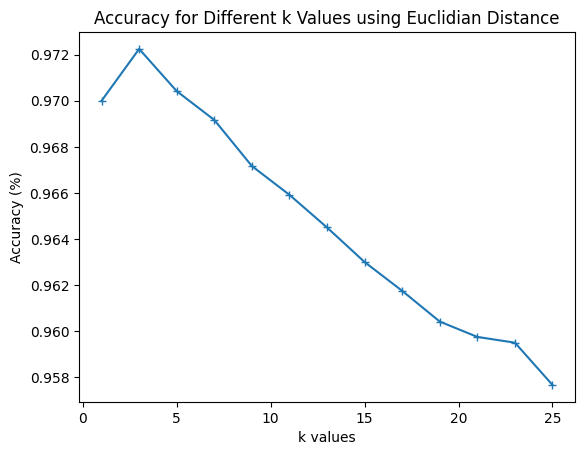

In [30]:
plt.plot(k_values, accuracy_list_euclidian, marker='+')
plt.title('Accuracy for Different k Values using Euclidian Distance')
plt.xlabel('k values')
plt.ylabel('Accuracy (%)')
plt.show()

_________________________
### Using Manhattan Distance

In [31]:
accuracy_list_manhattan = []

for k in k_values:

    knn_k = KNN(k)
    knn_k.fit(xtrain_new, ytrain_new)
    ypredictions = knn_k.predict_class_by_manhattan_distance(xvalidation)
    accuracy_manhattan = knn_k.accuracy(yvalidation, ypredictions)
    accuracy_list_manhattan.append(accuracy_manhattan)

    print(f'For k={k}, Accuracy is {accuracy_manhattan * 100:.2f}%')


For k=1, Accuracy is 96.30%
For k=3, Accuracy is 96.56%
For k=5, Accuracy is 96.53%
For k=7, Accuracy is 96.36%
For k=9, Accuracy is 96.05%
For k=11, Accuracy is 95.90%
For k=13, Accuracy is 95.82%
For k=15, Accuracy is 95.67%
For k=17, Accuracy is 95.53%
For k=19, Accuracy is 95.36%
For k=21, Accuracy is 95.22%
For k=23, Accuracy is 95.18%
For k=25, Accuracy is 95.03%


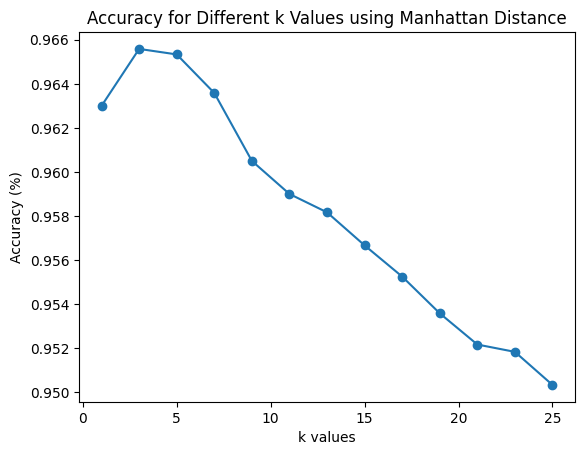

In [32]:
plt.plot(k_values, accuracy_list_manhattan , marker='o')
plt.title('Accuracy for Different k Values using Manhattan Distance')
plt.xlabel('k values')
plt.ylabel('Accuracy (%)')
plt.show()

__________________________________________________________
### Using Chebyshev Distance

In [33]:
accuracy_list_chebyshev = []

for k in k_values:

    knn_k = KNN(k)
    knn_k.fit(xtrain_new, ytrain_new)
    ypredictions = knn_k.predict_class_by_chebyshev_distance(xvalidation)
    accuracy_chebyshev = knn_k.accuracy(yvalidation, ypredictions)
    accuracy_list_chebyshev.append(accuracy_chebyshev)

    print(f'For k={k}, Accuracy is {accuracy_chebyshev * 100:.2f}%')

For k=1, Accuracy is 81.38%
For k=3, Accuracy is 81.34%
For k=5, Accuracy is 81.27%
For k=7, Accuracy is 81.01%
For k=9, Accuracy is 80.38%
For k=11, Accuracy is 80.23%
For k=13, Accuracy is 79.72%
For k=15, Accuracy is 79.77%
For k=17, Accuracy is 79.58%
For k=19, Accuracy is 79.03%
For k=21, Accuracy is 78.66%
For k=23, Accuracy is 78.60%
For k=25, Accuracy is 78.42%


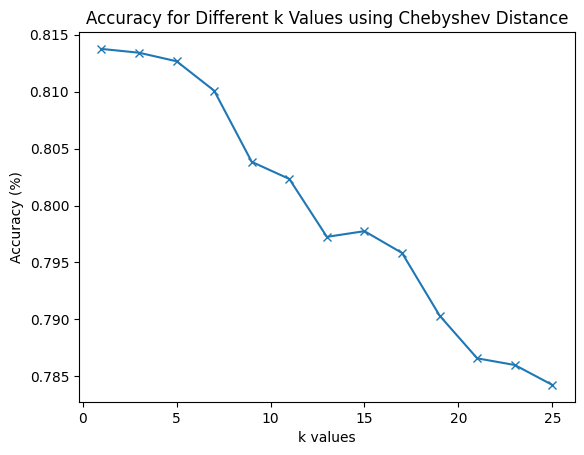

In [34]:
plt.plot(k_values, accuracy_list_chebyshev , marker='x')
plt.title('Accuracy for Different k Values using Chebyshev Distance')
plt.xlabel('k values')
plt.ylabel('Accuracy (%)')
plt.show()

_______________________________________________________________
### Now let us compare and see which is the best k value

In [40]:
accuracy_list_euclidian_percent = [round(x*100, 2) for x in accuracy_list_euclidian]
accuracy_list_manhattan_percent = [round(x*100, 2) for x in accuracy_list_manhattan]
accuracy_list_chebyshev_percent = [round(x*100, 2) for x in accuracy_list_chebyshev]

In [43]:
import pandas as pd

In [45]:
data = {"K value":k_values, "accuracy euclidean":accuracy_list_euclidian_percent, "accuracy manhattan":accuracy_list_manhattan_percent "accuracy chebyshev":accuracy_list_chebyshev_percent}
df = pd.DataFrame(data)

print(df)

    K value  accuracy euclidean  accuracy manhattan  accuracy chebyshev
0         1               97.00               96.30               81.38
1         3               97.22               96.56               81.34
2         5               97.04               96.53               81.27
3         7               96.92               96.36               81.01
4         9               96.72               96.05               80.38
5        11               96.59               95.90               80.23
6        13               96.45               95.82               79.72
7        15               96.30               95.67               79.77
8        17               96.17               95.53               79.58
9        19               96.04               95.36               79.03
10       21               95.97               95.22               78.66
11       23               95.95               95.18               78.60
12       25               95.77               95.03             

In [68]:
max_index_euclidean = df['accuracy euclidean'].idxmax()
best_k_euclidean = df.loc[max_index_euclidean, 'K value']
print("Highest accuracy for Euclidean knn is for k=",best_k_euclidean)


max_index_manhattan = df['accuracy manhattan'].idxmax()
best_k_manhattan = df.loc[max_index_manhattan, 'K value']
print("Highest accuracy for Manhattan knn is for k=",best_k_manhattan)


max_index_chebyshev = df['accuracy chebyshev'].idxmax()
best_k_chebyshev = df.loc[max_index_chebyshev, 'K value']
print("Highest accuracy for Chebyshev knn is for k=",best_k_chebyshev)


best_k = Counter([best_k_euclidean, best_k_manhattan, best_k_manhattan]).most_common()  # This will give [(x1,x2)] a tuple in a list
best_k = best_k[0][0]                                                                   # This gives x1
print("\nThen for max accuracy, overalll best k=",best_k)

Highest accuracy for Euclidean knn is for k= 3
Highest accuracy for Manhattan knn is for k= 3
Highest accuracy for Chebyshev knn is for k= 1

Then Overall best k for max accuracy is = 3


________________________________________
### Let's try for the test Data for k=3

In [70]:
# Using Euclidean Distance

knn_2 = KNN(best_k)
knn_2.fit(xtrain_new, ytrain_new)
ypredictions = knn_2.predict_class_by_euclidean_distance(xtest)
test_accuracy_euclidian = knn_2.accuracy(ytest, ypredictions)
print(f'for k={best_k}, Accuracy is {test_accuracy_euclidian * 100:.2f}%')


for k=3, Accuracy is 96.97%


In [71]:
# Using Manhattan Distance

knn_1 = KNN(best_k)
knn_1.fit(xtrain_new, ytrain_new)
ypredictions = knn_1.predict_class_by_manhattan_distance(xtest)
test_accuracy_manhattan = knn_1.accuracy(ytest, ypredictions)
print(f'for k={best_k}, Accuracy is {test_accuracy_manhattan * 100:.2f}%')


for k=3, Accuracy is 96.18%


In [72]:
# Using Chebyshev Distance

knn_inf = KNN(best_k)
knn_inf.fit(xtrain_new, ytrain_new)
ypredictions = knn_inf.predict_class_by_chebyshev_distance(xtest)
test_accuracy_chebyshev = knn_inf.accuracy(ytest, ypredictions)
print(f'for k={best_k}, Accuracy is {test_accuracy_chebyshev * 100:.2f}%')


for k=3, Accuracy is 81.29%


In [73]:
highest_test_accuracy = max(test_accuracy_euclidian, test_accuracy_chebyshev, test_accuracy_manhattan)
print(f"The highest accuracy for test case: {highest_test_accuracy * 100:.2f}%")

The highest accuracy for test case: 96.97%


_______________________________________________
### Lets plot a 3-D diagram for Accuracy

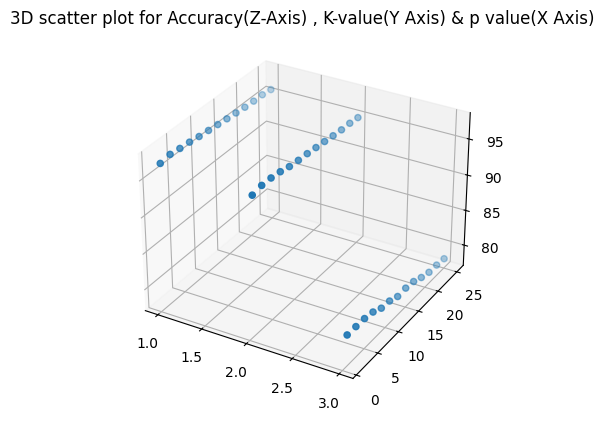

In [76]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection = "3d")
X = ([1]*13) + ([2]*13) +([3]*13) 
#y = [int(k) for k in range(1,26,2)]*3
Y = [int(k) for k in range(1,26,2)]*3
Z = []
Z.extend(accuracy_list_euclidian_percent)
Z.extend(accuracy_list_manhattan_percent)
Z.extend(accuracy_list_chebyshev_percent)
ax.scatter(X,Y,Z,'green')
ax.set_title('3D scatter plot for Accuracy(Z-Axis) , K-value(Y Axis) & p value(X Axis)')
plt.show()

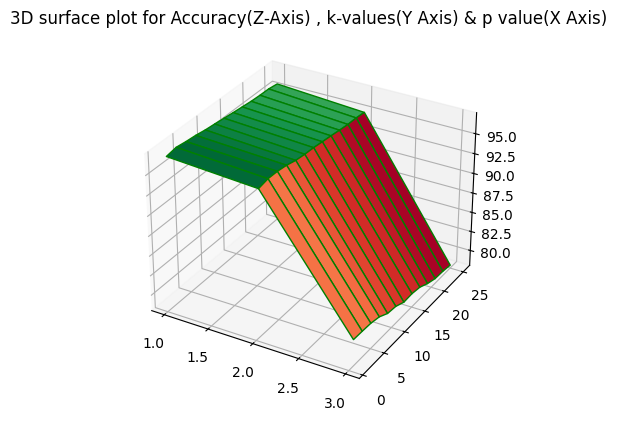

In [77]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection = "3d")

x = np.array([[1]*13 , ([2]*13) , ([3]*13)])            # [1] for Euclidean, [2] for Manhattan, [3] for Chebyshev;  this gives [ [1,1,..,1],[2,2,..,2],[3,3,..,3]]

b = [int(k) for k in range (1,26,2)]
y = np.array([b,b,b])                                   # all k values ie 1,3,5,..,25 stored 3 times

z = np.array([list(accuracy_list_euclidian_percent),list(accuracy_list_manhattan_percent),list(accuracy_list_chebyshev_percent)])

ax.plot_surface(x,y,z,cmap = 'RdYlGn',edgecolor = 'green')
ax.set_title('3D surface plot for Accuracy(Z-Axis) , k-values(Y Axis) & p value(X Axis)')


plt.show()